In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt


In [2]:
covid = pd.read_csv("Covid19_Karnataka.csv")
#covid = pd.read_csv("Covid_19_KarnatakaData.csv")

#covid = pd.read_csv("c:\Users\sunitha.vv\Documents\Phyton\covid_19_data.csv")
covid.head(15)

,Date,State,Cured,Deaths,Confirmed
0,1/1/2021,Karnataka,896116,12090,919496
1,1/2/2021,Karnataka,897200,12096,920373
2,1/3/2021,Karnataka,898176,12099,921128
3,1/4/2021,Karnataka,898919,12107,921938
4,1/5/2021,Karnataka,900202,12110,922538
5,1/6/2021,Karnataka,901579,12118,923353
6,1/7/2021,Karnataka,902817,12124,924137
7,1/8/2021,Karnataka,903629,12131,924898
8,1/9/2021,Karnataka,904286,12134,925868
9,1/10/2021,Karnataka,905158,12138,926767


In [3]:
covid.tail(15)

,Date,State,Cured,Deaths,Confirmed
124,5/5/2021,Karnataka,1210013,16538,1690934
125,5/6/2021,Karnataka,1236854,16884,1741046
126,5/7/2021,Karnataka,1255797,17212,1790104
127,5/8/2021,Karnataka,1284420,17804,1838885
128,5/9/2021,Karnataka,1319301,18286,1886448
129,5/10/2021,Karnataka,1351097,18776,1934378
130,5/11/2021,Karnataka,1383285,19372,1973683
131,5/12/2021,Karnataka,1405869,19852,2013193
132,5/13/2021,Karnataka,1440621,20368,2053191
133,5/14/2021,Karnataka,1474678,20712,2088488


In [4]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking Data-type",covid.dtypes)

Size/Shape of the dataset (139, 5)
Checking for null values Date         0
State        0
Cured        0
Deaths       0
Confirmed    0
dtype: int64
Checking Data-type Date         object
State        object
Cured         int64
Deaths        int64
Confirmed     int64
dtype: object


In [5]:
covid["ObservationDate"] = pd.to_datetime(covid["Date"])

In [6]:
#Grouping differnent types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Cured":"sum","Deaths":"sum"})


In [7]:
print("Basic Information")
print("Total number of Confirmed cases in Karnataka",datewise["Confirmed"].iloc[-1])
print("Total number of Cured cases in Karnataka",datewise["Cured"].iloc[-1])
print("Total number of Death cases in Karnataka",datewise["Deaths"].iloc[-1])
print("Total number of Active cases in Karnataka",(datewise["Confirmed"].iloc[-1]-datewise["Cured"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases in Karnataka",(datewise["Cured"].iloc[-1]+datewise["Deaths"].iloc[-1]))


Basic Information
Total number of Confirmed cases in Karnataka 2272374
Total number of Cured cases in Karnataka 1674487
Total number of Death cases in Karnataka 22838
Total number of Active cases in Karnataka 575049
Total number of Closed cases in Karnataka 1697325


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138]),
 [Text(0, 0, '2021-01-01'),
  Text(1, 0, '2021-01-02'),
  Text(2, 0, '2021-01-03'),
  Text(3, 0, '2021-01-04'),
  Text(4, 0, '2021-01-05'),
  Text(5, 0, '2021-01-06'),
  Text(6, 0, '2021-01-07'),
  Text(7, 0, '2021-

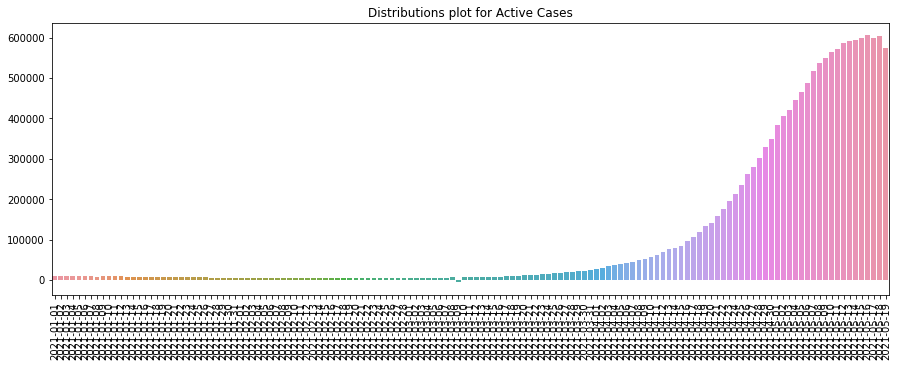

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Cured"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138]),
 [Text(0, 0, '2021-01-01'),
  Text(1, 0, '2021-01-02'),
  Text(2, 0, '2021-01-03'),
  Text(3, 0, '2021-01-04'),
  Text(4, 0, '2021-01-05'),
  Text(5, 0, '2021-01-06'),
  Text(6, 0, '2021-01-07'),
  Text(7, 0, '2021-

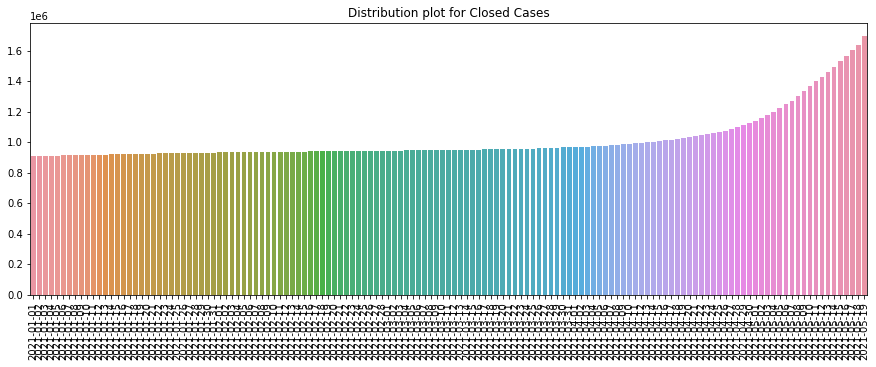

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Cured"]+datewise["Deaths"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

In [ ]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Cured"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth =3)
plt.plot(week_num,weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

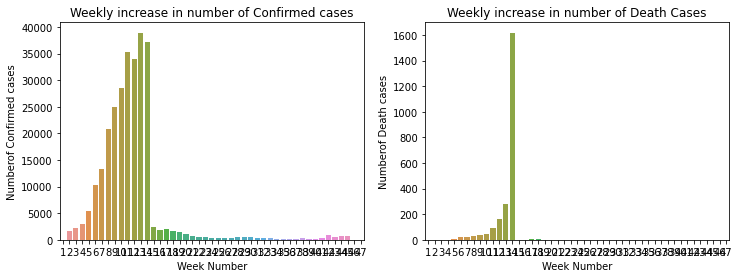

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

Average increase in number of Confirmed cases everyday: 9733.0
Average increase in number of Cured cases everyday: 5600.0
Average increase in number of Death cases everyday: 77.0


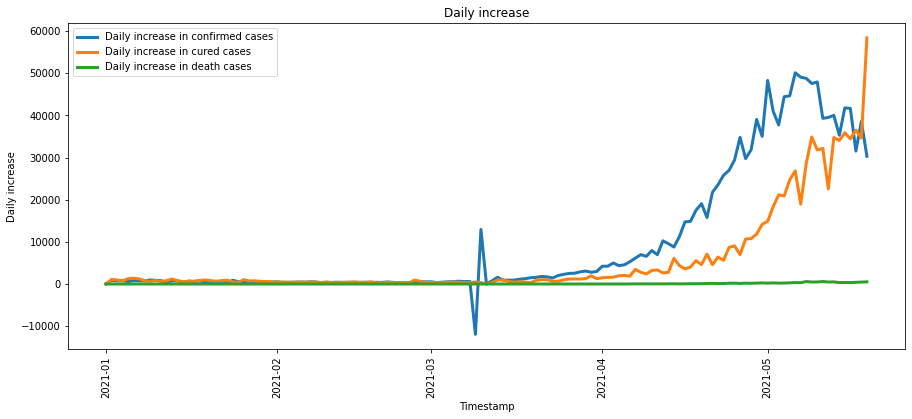

In [93]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Cured cases everyday:",np.round(datewise["Cured"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Cured"].diff().fillna(0),label="Daily increase in cured cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [12]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [13]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

C:\Users\sunitha.vv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [14]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [57]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)

,Dates,LR,SVR
0,2021-05-20,1416704,1984334
1,2021-05-21,1421450,2022778
2,2021-05-22,1426196,2062337
3,2021-05-23,1430941,2103035
4,2021-05-24,1435687,2144895
5,2021-05-25,1440433,2187942
6,2021-05-26,1445178,2232202
7,2021-05-27,1449924,2277700
8,2021-05-28,1454669,2324462
9,2021-05-29,1459415,2372514


In [23]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [24]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

C:\Users\sunitha.vv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-24-f35039d93b02>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)


In [22]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]= holt_new_prediction
model_predictions.head(20)

#print(model_predictions)


NameError: name 'model_predictions' is not defined